## Brussels Mat. Step 1.a Material Densities

The following code describes the process for the computation of material densities by m2 of floor space. These material densities are used for the estimation of total material demands for the building stock.

The following file describes the definition of building types for the residential rector for Brussels.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.DataFrame(
    [np.nan, 0.03, 2.18, 0.02, np.nan, 0.02],
    index=['Textiles', 'Metal', 'Minerals', 'Plastic', 'Chemicals', 'Wood'])
data.columns = [2013]
data.index.name = 'Material type'

In [3]:
data_years = pd.DataFrame(index=['Textiles', 'Metal', 'Minerals', 'Plastic', 'Chemicals', 'Wood'])

In [4]:
end_year = 2016
str_year = 1945
step = 5
diff = int((end_year - str_year -1) / step + 1)
rate = np.asarray([0, -0.0006, 0.015, -0.0006, 0, 0.001])

In [5]:
for e, year in enumerate(range(str_year, end_year, step)):
    e += 1
    a = (diff - e) / diff
    data_years.loc[:, year] = data.loc[:, 2013] + a * rate

In [6]:
data_years

1945      1950     1955      1960      1965     1970      1975  \
Textiles        NaN       NaN      NaN       NaN       NaN      NaN       NaN   
Metal      0.029440  0.029480  0.02952  0.029560  0.029600  0.02964  0.029680   
Minerals   2.194000  2.193000  2.19200  2.191000  2.190000  2.18900  2.188000   
Plastic    0.019440  0.019480  0.01952  0.019560  0.019600  0.01964  0.019680   
Chemicals       NaN       NaN      NaN       NaN       NaN      NaN       NaN   
Wood       0.020933  0.020867  0.02080  0.020733  0.020667  0.02060  0.020533   

               1980     1985      1990      1995     2000      2005      2010  \
Textiles        NaN      NaN       NaN       NaN      NaN       NaN       NaN   
Metal      0.029720  0.02976  0.029800  0.029840  0.02988  0.029920  0.029960   
Minerals   2.187000  2.18600  2.185000  2.184000  2.18300  2.182000  2.181000   
Plastic    0.019720  0.01976  0.019800  0.019840  0.01988  0.019920  0.019960   
Chemicals       NaN      NaN       NaN       NaN      NaN       NaN       NaN   
Wood       0.020467  0.02040  0.020333  0.020267  0.02020  0.020133  0.020067   

           2015  
Textiles    NaN  
Metal      0.03  
Minerals   2.18  
Plastic    0.02  
Chemicals   NaN  
Wood       0.02

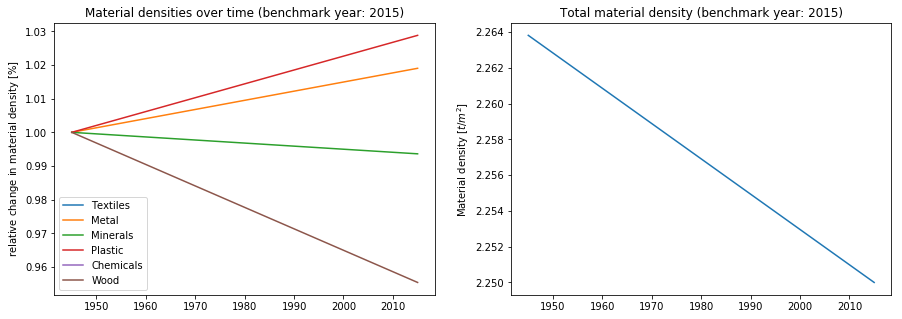

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
data_years.div(data_years.loc[:, 1945], axis=0).T.plot(ax=ax1)
ax1.set_ylabel('relative change in material density $[\%]$')
ax1.set_title('Material densities over time (benchmark year: 2015)')
data_years.sum().plot(ax=ax2)
ax2.set_ylabel('Material density $[t/m^2]$')
ax2.set_title('Total material density (benchmark year: 2015)');

In [8]:
typ = [
    "Detached",
    "Semi-detached", 
    "Terraced",
    "Apartment - enclosed", 
    "Apartment - exposed"]

In [9]:
def formatnumbers(x):
    x = str(x).replace(',', '.')
    x = float(x)
    return x

In [10]:
tabula = pd.read_excel('TABULA.xlsx', sheet_name='TABULA-2',
                       usecols=[0,2,3,4,5,6,7,8,9], index_col=[2,0,1],
                       skip_footer = 148,
                       converters = {
                           1: formatnumbers,
                           2: formatnumbers,
                           3: formatnumbers,
                           4: formatnumbers,
                           5: formatnumbers,
                       }
                      )

In [11]:
tabula.index.names = ['Construction Year', 'Construction Type', 'Size']

In [12]:
tabula.head()

Number of housing units  \
Construction Year Construction Type Size                                     
pre '46           SFH               Detached                             1   
                                    Semi-detached                        1   
                                    Terraced                             1   
                  MFH               Small                                6   
                                    Medium                              12   

                                                   Floor surface area per housing unit (m2)  \
Construction Year Construction Type Size                                                      
pre '46           SFH               Detached                                          279.0   
                                    Semi-detached                                     237.0   
                                    Terraced                                          225.9   
                  MFH               Small                                              75.0   
                                    Medium                                             96.0   

                                                   Protected volume (m³)  \
Construction Year Construction Type Size                                   
pre '46           SFH               Detached                       766.0   
                                    Semi-detached                  651.8   
                                    Terraced                       621.3   
                  MFH               Small                         1716.0   
                                    Medium                        5166.6   

                                                   Total building envelope area (m²)  \
Construction Year Construction Type Size                                               
pre '46           SFH               Detached                                   599.2   
                                    Semi-detached                              447.1   
                                    Terraced                                   323.0   
                  MFH               Small                                      558.8   
                                    Medium                                    1112.7   

                                                   Roof (m²)  \
Construction Year Construction Type Size                       
pre '46           SFH               Detached           158.4   
                                    Semi-detached      119.9   
                                    Terraced            90.0   
                  MFH               Small              165.0   
                                    Medium             215.0   

                                                   Exterior wall (m2)  
Construction Year Construction Type Size                               
pre '46           SFH               Detached                    228.9  
                                    Semi-detached               158.2  
                                    Terraced                     92.0  
                  MFH               Small                       114.7  
                                    Medium                      292.5

In [13]:
tabula.to_csv('data/tabula.csv')

In [14]:
facade = tabula.iloc[:, 5] / tabula.iloc[:, 0].mul(tabula.iloc[:, 1])
facade = facade.unstack(level=[1,2])
facade.index = [1970, 1990, 2005, 2016, 1946]
facade = facade.sort_index()

In [15]:
a = facade.plot(figsize=(15,5))
a.set_ylabel("Facade Floor-space ratio")
a.set_title("Facade floor-space ration for building typologies");

In [16]:
facade_plot = facade.loc[:, (['SFH '], ['Detached'])]

In [17]:
def make_trend(facade_plot, years_to_fit = [i for i in data_years.columns]):
    if isinstance(facade_plot, pd.Series):
        FFR = facade_plot
    else:
        FFR = np.asanyarray(facade_plot.iloc[:, 0])
    z = np.polyfit(y=FFR, x=facade_plot.index, deg=1)
    p = np.poly1d(z)
    return p(years_to_fit)

In [18]:
trend_p = make_trend(facade_plot)

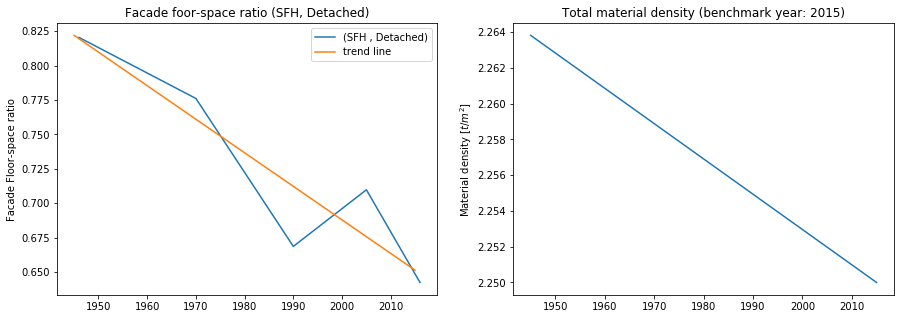

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
facade_plot.plot(ax=ax1)
ax1.plot([i for i in data_years.columns], trend_p, label="trend line")
ax1.legend()
ax1.set_ylabel("Facade Floor-space ratio")
ax1.set_title('Facade foor-space ratio (SFH, Detached)')
#ax1.legend('off')
data_years.sum().plot(ax=ax2)
ax2.set_ylabel('Material density $[t/m^2]$')
ax2.set_title('Total material density (benchmark year: 2015)');

In [20]:
def _plot_fig(trend_md, ratio, years_to_fit = []):
    fig, ax1 = plt.subplots(1, 1, figsize=(7,5))
    if len(years_to_fit) >= 1:
        ax1.plot(years_to_fit, trend_md)
        ax1.set_xlabel('Construction year')
        ax1.set_ylabel('Material density (MD) $[t/m^2]$')
        ax1.set_title('Relationship between construction year and MD')
    else:
        ax1.plot(trend_md, ratio)
        ax1.set_xlabel('Material density (MD) $[t/m^2]$')
        ax1.set_title('Relationship between FFR and MD')
        ax1.set_ylabel('Facade Floor-space ratio (FFR)')

In [21]:
z = np.polyfit(x=make_trend(facade.iloc[:, 0]), y=data_years.sum(), deg=1)
p = np.poly1d(z)
def get_MD(facade_plot, ratio = False, plot_fig = False, years_to_fit = []):
    if len(years_to_fit) >= 1:
        ratio = make_trend(facade_plot, years_to_fit = typ_years)
    trend_md = p(ratio)
    if plot_fig:
        _plot_fig(trend_md, ratio, years_to_fit = years_to_fit)
    return trend_md

In [22]:
typ_years = [1900, 1918, 1945, 1961, 1970, 1981, 1991, 2011, 2016, 2020, 2035]
FFR_typ = pd.DataFrame(index=typ_years)
for e, i in enumerate(facade):
    if any(facade.iloc[:, e].isna()):
        inx_nan = [e for e,i in enumerate(facade.iloc[:, e].isna()) if i]
        if e >= 1:
            facade.iloc[inx_nan, e] = facade.iloc[inx_nan, e-1]
        else:
            facade.iloc[inx_nan, e] = facade.iloc[inx_nan, e+1]
    FFR = facade.iloc[:, e]
    trend_md = get_MD(FFR, years_to_fit = typ_years)
    inx = "".join(i)
    FFR_typ.loc[:, inx] = trend_md

In [23]:
p = FFR_typ.plot(figsize=(15,5))
p.set_title("Total material density for building types")
p.set_ylabel('Material density (MD) $[t/m^2]$');
#p.set_ylim((2.2726, 2.273));

In [24]:
FFR_typ = FFR_typ.T

In [25]:
FFR_typ

1900      1918      1945      1961      1970      1981  \
SFH Detached       2.272693  2.269141  2.263813  2.260656  2.258880  2.256709   
SFH Semi-detached  2.264013  2.260413  2.255012  2.251812  2.250012  2.247812   
SFH Terraced       2.232643  2.231925  2.230848  2.230209  2.229850  2.229411   
MFH Small          2.197642  2.206479  2.219734  2.227589  2.232007  2.237408   
MFH Medium         2.207932  2.211288  2.216320  2.219302  2.220980  2.223030   
MFH Large          2.215709  2.216820  2.218487  2.219475  2.220030  2.220710   

                       1991      2011      2016      2020      2035  
SFH Detached       2.254736  2.250789  2.249803  2.249013  2.246053  
SFH Semi-detached  2.245812  2.241811  2.240811  2.240011  2.237011  
SFH Terraced       2.229012  2.228214  2.228014  2.227854  2.227256  
MFH Small          2.242317  2.252136  2.254590  2.256554  2.263918  
MFH Medium         2.224894  2.228622  2.229554  2.230300  2.233095  
MFH Large          2.221327  2.222562  2.222870  2.223117  2.224043

In [26]:
data_years_nn = data_years.dropna()

In [27]:
def _get_p(data, i):
    z = np.polyfit(x=data.columns, y=data.iloc[i], deg=1)
    p = np.poly1d(z)
    return p

In [28]:
all_shares = pd.DataFrame(index=typ_years)
for i in range(data_years_nn.shape[0]):
    p =  _get_p(data_years_nn, i)
    shares = [p(y) for y in typ_years]
    all_shares.loc[:, data_years_nn.index[i]] = shares
all_shares = all_shares.div(all_shares.sum(axis=1), axis=0)

In [29]:
densities = pd.DataFrame()
for i in range(FFR_typ.shape[0]):
    temp = all_shares.mul(FFR_typ.iloc[i], axis=0)
    #temp.index = ["a", temp.index]
    tuples = [(FFR_typ.index[i], j) for j in temp.index]
    index = pd.MultiIndex.from_tuples(tuples, names=['Building type', 'Construction year'])
    temp.index = index
    densities = densities.append(temp)

In [30]:
densities.head(15)

Metal  Minerals   Plastic      Wood
Building type     Construction year                                        
SFH Detached      1900               0.029080  2.203000  0.019080  0.021533
                  1918               0.029224  2.199400  0.019224  0.021293
                  1945               0.029440  2.194000  0.019440  0.020933
                  1961               0.029568  2.190800  0.019568  0.020720
                  1970               0.029640  2.189000  0.019640  0.020600
                  1981               0.029728  2.186800  0.019728  0.020453
                  1991               0.029808  2.184800  0.019808  0.020320
                  2011               0.029968  2.180800  0.019968  0.020053
                  2016               0.030008  2.179800  0.020008  0.019987
                  2020               0.030040  2.179000  0.020040  0.019933
                  2035               0.030160  2.176000  0.020160  0.019733
SFH Semi-detached 1900               0.028969  2.194586  0.019007  0.021451
                  1918               0.029112  2.190940  0.019150  0.021211
                  1945               0.029326  2.185470  0.019364  0.020852
                  1961               0.029452  2.182229  0.019491  0.020639

In [31]:
densities.to_csv('data/densities.csv')

In [32]:
con = ["{}".format(i).strip() for i in tabula.index.droplevel([0,1])]
typ = ["{}".format(j).strip() for j in tabula.index.droplevel([0,2])]

In [33]:
tabula.loc[:, 'con'] = con
tabula.loc[:, 'typ'] = typ

/usr/lib/python3.6/site-packages/ipykernel/ipkernel.py:208: PerformanceWarning: indexing past lexsort depth may impact performance.
  res = shell.run_cell(code, store_history=store_history, silent=silent)


In [34]:
tabula_reg = tabula.loc[:, ['Floor surface area per housing unit (m2)', 'con', 'typ']]
tabula_reg.columns = ['area', 'con', 'typ']

In [35]:
tabula.typ == "SFH"

Construction Year  Construction Type  Size         
pre '46            SFH                Detached          True
                                      Semi-detached     True
                                      Terraced          True
                   MFH                Small            False
                                      Medium           False
'46-'70            SFH                Detached          True
                                      Semi-detached     True
                                      Terraced          True
                   MFH                Small            False
                                      Medium           False
                                      Large            False
'71-'90            SFH                Detached          True
                                      Semi-detached     True
                                      Terraced          True
                   MFH                Small            False
                                 

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


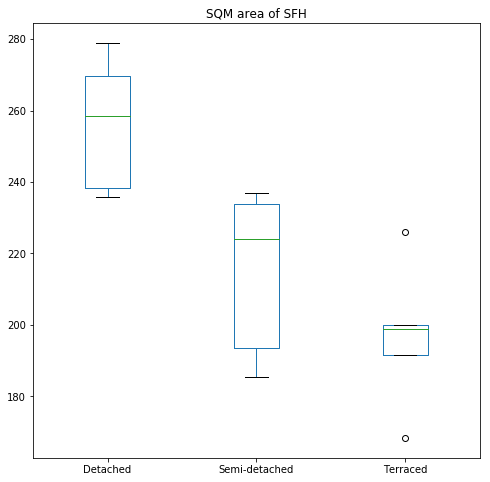

In [36]:
p = tabula_reg.loc[tabula.typ == 'SFH', 'area'].unstack(2).plot.box(figsize=(8,8))
p.set_title("SQM area of SFH");

In [37]:
p = tabula_reg.loc[tabula.typ == 'MFH', 'area'].unstack(2).plot.box(figsize=(8,8))
p.set_title("SQM area of MFH");

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


In [38]:
tabula_reg.loc[tabula.typ == 'MFH', 'area'].unstack(2)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


Size                                 Large  Medium  Small
Construction Year Construction Type                      
'46-'70           MFH                105.0    88.0   70.0
'71-'90           MFH                 85.0   125.0   70.0
'91-'05           MFH                105.0   110.0  155.0
post '05          MFH                121.3    96.0   75.0
pre '46           MFH                  NaN    96.0   75.0

In [46]:
def get_year_lable(year, year_ranges, tabula):
    inx_year = [e for e, i in enumerate(year_ranges) if year >= i[0] and year <= i[1]][0]
    year_lable = tabula.index.get_level_values(0).unique()[inx_year]
    return year_lable

def clean_year(y):
    years = []
    flip = False
    highest = 0
    for i in y.split("'"):
        if 'post' in i: flip = True
        if len(i) >= 1:
            i = i.replace('-', '')
            i = i.replace('pre', '-inf')
            i = i.replace('post', 'inf')
            i = float(i)
            if i >= 40:
                i += 1900
            else:
                i += 2000
            if i <= highest:
                i += 1
            highest = i
            years.append(i)
    if flip:
        years = years[::-1]
    return years

def get_typ(year, construction, sqm, tabula = tabula):
    construction += ' '
    con_year = get_year_lable(2006, year_ranges, tabula)
    temp = tabula.loc[(con_year, construction, slice(None)), "Floor surface area per housing unit (m2)"]
    p = random.random()
    temp_p = 1 - (abs(temp - sqm) / sum(abs(temp - sqm)))
    temp_sel = temp_p.loc[temp_p >= p]
    if temp_sel.shape[0] > 1:
        temp_sel = temp_sel.loc[temp_sel == temp_sel.min()]
    elif temp_sel.shape[0] == 0:
        temp_sel = temp_p.loc[temp_p == temp_p.max()]
    if temp_sel.shape[0] == 0:
        print('error')
    btyp = "{} {}".format(
        temp_sel.index.get_level_values(1)[0].strip(),
        temp_sel.index.get_level_values(2)[0].strip())
    return(btyp)

def get_den(year, p, densities):
    cyear_inx = densities.index.get_level_values(1).unique()
    year_diff = [abs(int(i) - int(year)) for i in cyear_inx]
    sel_inx = [e for e, i in enumerate(year_diff) if i == min(year_diff)][0]
    den = densities.loc[(p, cyear_inx[sel_inx])]
    return den

In [47]:
import random
year_ranges = [clean_year(i) for i in tabula.index.get_level_values(0).unique()]

In [48]:
sqm = 210
year = 1946
construction = "SFH"
random.seed(1234)
print("Tab. Material intensities of selected building typologies{sep}\
for construction year:\t{}{sep}\
and construction type:\t{}{sep}\
with a flor area of:\t{} m^2".format(year, construction, sqm, sep='\n'))
print("-" * 60)
print("| {:<20} | {:^6} | {:^6} | {:^6} | {:^6} |".format('Building Type', "Metals", "Mine.", "Plas.", "Wood"))
print("=" * 60)
for i in range(20):
    p = get_typ(year, construction, sqm, tabula = tabula)
    d = get_den(year, p, densities)
    print("| {:<20} | {} |".format(p, " | ".join(["{:0.4f}".format(i) for i in d])))
print("-" * 60)

Tab. Material intensities of selected building typologies
for construction year:	1946
and construction type:	SFH
with a flor area of:	210 m^2
------------------------------------------------------------
| Building Type        | Metals | Mine.  | Plas.  |  Wood  |
| SFH Terraced         | 0.0290 | 2.1621 | 0.0192 | 0.0206 |
| SFH Semi-detached    | 0.0293 | 2.1855 | 0.0194 | 0.0209 |
| SFH Detached         | 0.0294 | 2.1940 | 0.0194 | 0.0209 |
| SFH Terraced         | 0.0290 | 2.1621 | 0.0192 | 0.0206 |
| SFH Terraced         | 0.0290 | 2.1621 | 0.0192 | 0.0206 |
| SFH Semi-detached    | 0.0293 | 2.1855 | 0.0194 | 0.0209 |
| SFH Semi-detached    | 0.0293 | 2.1855 | 0.0194 | 0.0209 |
| SFH Detached         | 0.0294 | 2.1940 | 0.0194 | 0.0209 |
| SFH Terraced         | 0.0290 | 2.1621 | 0.0192 | 0.0206 |
| SFH Detached         | 0.0294 | 2.1940 | 0.0194 | 0.0209 |
| SFH Detached         | 0.0294 | 2.1940 | 0.0194 | 0.0209 |
| SFH Terraced         | 0.0290 | 2.1621 | 0.0192 | 0.0206 |
| SF